In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [2]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import set_config

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [8]:
df= pd.read_csv('/content/drive/MyDrive/Mushroom_Train/Mushroom_Train.csv')

In [7]:
df_test = pd.read_csv('/content/drive/MyDrive/Mushroom_Train/test.csv')

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df_train = df.drop(columns=['class'],axis = 1)

In [11]:
df_train.isnull().sum()/df_train.shape[0]*100

,0
id,0.000000
cap-diameter,0.000128
cap-shape,0.001283
cap-surface,21.528227
cap-color,0.000385
does-bruise-or-bleed,0.000257
gill-attachment,16.809280
gill-spacing,40.373988
gill-color,0.001829
stem-height,0.000000



#Data Cleaning

In [12]:
df_train.drop(columns = ['stem-root' , 'stem-surface' , 'veil-type' , 'veil-color' , 'spore-print-color' , 'gill-spacing'] , inplace = True )
df_test.drop(columns = ['stem-root' , 'stem-surface' , 'veil-type' , 'veil-color' , 'spore-print-color' , 'gill-spacing'] , inplace = True)

In [13]:
print(df_train.shape,df_test.shape)

(3116945, 15) (2077964, 15)


In [14]:
#CODE SNIPPET FOR ITERATING IN VALUE COUNT LIST of genuine categorical values
cap_shape_list = []
for shape , count in df_train['cap-shape'].value_counts().items():
  if count > 500 :
    cap_shape_list.append(shape)

print(cap_shape_list)

['x', 'f', 's', 'b', 'o', 'p', 'c']


In [15]:
df_train['cap-surface'].value_counts()
cap_surface_list = []
for shape , count in df_train['cap-surface'].value_counts().items():
  if count > 44000 :
    cap_surface_list.append(shape)

print(cap_surface_list)

['t', 's', 'y', 'h', 'g', 'd', 'k', 'e', 'i', 'w', 'l']


In [16]:
df_train['cap-color'].value_counts()
cap_color_list = []
for shape , count in df_train['cap-color'].value_counts().items():
  if count > 39000 :
    cap_color_list.append(shape)

print(cap_color_list)

['n', 'y', 'w', 'g', 'e', 'o', 'p', 'r', 'u', 'b', 'k', 'l']


In [17]:
df_train['gill-attachment'].value_counts()
gill_attachment_list = []
for shape , count in df_train['gill-attachment'].value_counts().items():
  if count > 39000 :
    gill_attachment_list.append(shape)

print(gill_attachment_list)

['a', 'd', 'x', 'e', 's', 'p', 'f']


In [18]:
df_train['gill-color'].value_counts()
gill_color_list = []
for shape , count in df_train['gill-color'].value_counts().items():
  if count > 39000 :
    gill_color_list.append(shape)

print(gill_color_list)

['w', 'n', 'y', 'p', 'g', 'o', 'k', 'f', 'r', 'e', 'b', 'u']


In [19]:
df_train['stem-color'].value_counts()
stem_color_list = []
for shape , count in df_train['stem-color'].value_counts().items():
  if count > 500 :
    stem_color_list.append(shape)

print(stem_color_list)

['w', 'n', 'y', 'g', 'o', 'e', 'u', 'p', 'k', 'r', 'l', 'b', 'f']


In [20]:

df_train['cap-shape'] = df_train['cap-shape'].apply(lambda x: x if x in cap_shape_list else np.nan)

df_train['cap-surface'] = df_train['cap-surface'].apply(lambda x: x if x in cap_surface_list else np.nan)

df_train['cap-color'] = df_train['cap-color'].apply(lambda x: x if x in cap_color_list else np.nan)

df_train['does-bruise-or-bleed'] = df_train['does-bruise-or-bleed'].apply(lambda x: x if x in ['t' , 'f'] else np.nan)

df_train['gill-attachment'] = df_train['gill-attachment'].apply(lambda x: x if x in gill_attachment_list else np.nan)

df_train['gill-color'] = df_train['gill-color'].apply(lambda x: x if x in gill_color_list else np.nan)

df_train['stem-color'] = df_train['stem-color'].apply(lambda x: x if x in stem_color_list else np.nan)

df_train['has-ring'] = df_train['has-ring'].apply(lambda x: x if x in ['t' , 'f'] else np.nan)

df_train['ring-type'] = df_train['ring-type'].apply(lambda x: x if x in ['f','e','z','l','r','p','g','m'] else np.nan)

df_train['habitat'] = df_train['habitat'].apply(lambda x: x if x in ['d','g','l','m','h','w','p','u'] else np.nan)

df_train.drop(columns = ['id'] , inplace = True)

In [21]:
df_test['cap-shape'] = df_test['cap-shape'].apply(lambda x: x if x in cap_shape_list else np.nan)

df_test['cap-surface'] = df_test['cap-surface'].apply(lambda x: x if x in cap_surface_list else np.nan)

df_test['cap-color'] = df_test['cap-color'].apply(lambda x: x if x in cap_color_list else np.nan)

df_test['does-bruise-or-bleed'] = df_test['does-bruise-or-bleed'].apply(lambda x: x if x in ['t' , 'f'] else np.nan)

df_test['gill-attachment'] = df_test['gill-attachment'].apply(lambda x: x if x in gill_attachment_list else np.nan)

df_test['gill-color'] = df_test['gill-color'].apply(lambda x: x if x in gill_color_list else np.nan)

df_test['stem-color'] = df_test['stem-color'].apply(lambda x: x if x in stem_color_list else np.nan)

df_test['has-ring'] = df_test['has-ring'].apply(lambda x: x if x in ['t' , 'f'] else np.nan)

df_test['ring-type'] = df_test['ring-type'].apply(lambda x: x if x in ['f','e','z','l','r','p','g','m'] else np.nan)

df_test['habitat'] = df_test['habitat'].apply(lambda x: x if x in ['d','g','l','m','h','w','p','u'] else np.nan)

df_test.drop(columns = ['id'] , inplace = True)

In [22]:
print(df_train.shape , df_test.shape)

(3116945, 14) (2077964, 14)


0.0157846866082013


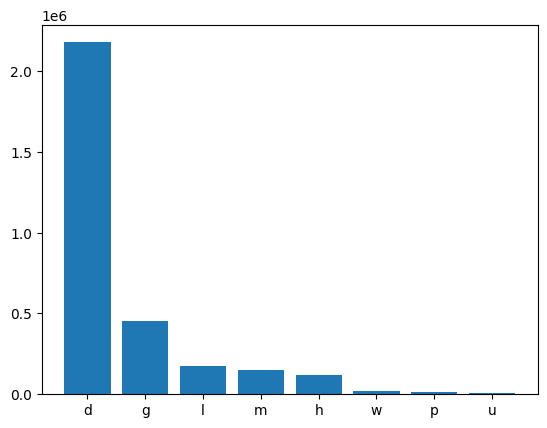

In [23]:
plt.bar(df_train['habitat'].value_counts().index , df_train['habitat'].value_counts())
print(df_train['habitat'].isnull().sum()/len(df_train)*100)

#Outliers Handling

In [24]:
upper_limit = df_train['cap-diameter'].mean() + 3*df_train['cap-diameter'].std()
print(upper_limit)
lower_limit = df_train['cap-diameter'].mean() - 3*df_train['cap-diameter'].std()
print(lower_limit)

20.28363990326598
-7.663943187800406


In [25]:
sum = 0
for x in df_train['cap-diameter']:
  if x > upper_limit or x < lower_limit:
    sum += 1
print(sum , sum/len(df_train)*100)

22773 0.7306192441637565


In [26]:
upper = df_train['cap-diameter'].quantile(0.99)
print(upper)
lower = df_train['cap-diameter'].quantile(0.01)
print(lower)

18.86
0.74


In [27]:
sum = 0
for x in df_train['cap-diameter']:
  if x > upper or x < lower:
    sum += 1
print(sum , sum/len(df_train)*100)

61843 1.984090190876002


In [28]:
percentile75 = df_train['cap-diameter'].quantile(0.75)
percentile25 = df_train['cap-diameter'].quantile(0.25)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit , lower_limit)

sum = 0
for x in df_train['cap-diameter']:
  if x > upper_limit or x < lower_limit:
    sum += 1
print(sum , sum/len(df_train)*100)

df_train['cap-diameter'] = np.where(df_train['cap-diameter'] > upper_limit , upper_limit ,
                                  np.where(df_train['cap-diameter'] < lower_limit , lower_limit ,df_train['cap-diameter']) )

15.620000000000001 -4.0600000000000005
76124 2.4422631775664954


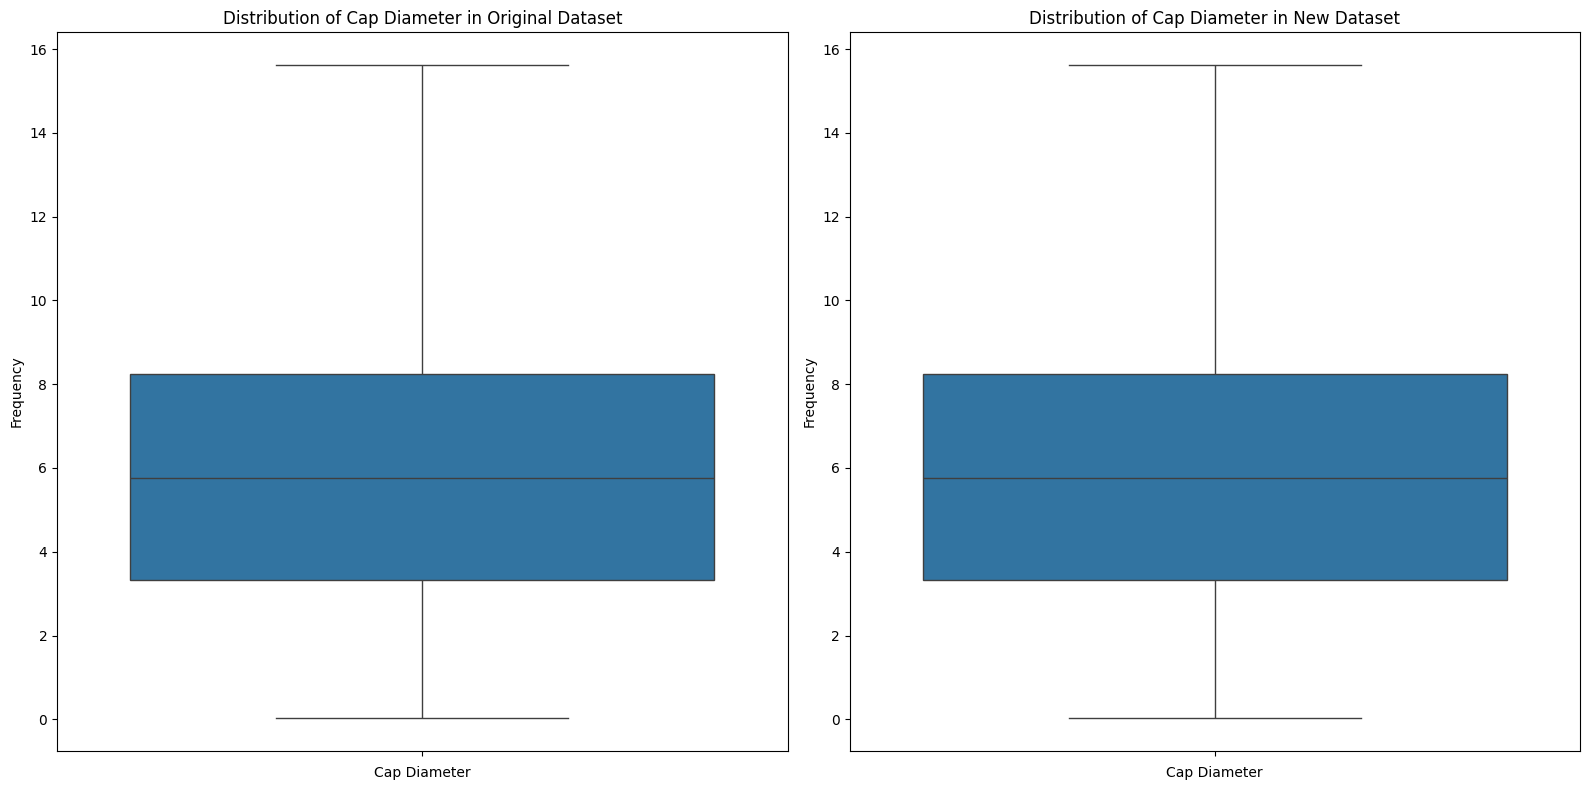

In [29]:
plt.figure(figsize=(16, 8))

# First subplot
plt.subplot(1, 2, 1)
sns.boxplot(df_train['cap-diameter'])  # Or sns.kdeplot(df_train['cap-diameter'])

plt.title('Distribution of Cap Diameter in Original Dataset')
plt.xlabel('Cap Diameter')
plt.ylabel('Frequency')

# Second subplot
plt.subplot(1, 2, 2)
sns.boxplot(df_train['cap-diameter'])  # Or sns.kdeplot(df_train['cap-diameter'])

plt.title('Distribution of Cap Diameter in New Dataset')
plt.xlabel('Cap Diameter')
plt.ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
percentile75 = df_train['stem-width'].quantile(0.75)
percentile25 = df_train['stem-width'].quantile(0.25)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit , lower_limit)


sum = 0
for x in df_train['stem-width']:
  if x > upper_limit or x < lower_limit:
    sum += 1
print(sum , sum/len(df_train)*100)

df_train['stem-width'] = np.where(df_train['stem-width'] > upper_limit , upper_limit ,
                                  np.where(df_train['stem-width'] < lower_limit , lower_limit ,df_train['stem-width']) )

31.62 -11.02
66481 2.1328897365850215


In [31]:
percentile75 = df_train['stem-height'].quantile(0.75)
percentile25 = df_train['stem-height'].quantile(0.25)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit , lower_limit)


sum = 0
for x in df_train['stem-height']:
  if x > upper_limit or x < lower_limit:
    sum += 1
print(sum , sum/len(df_train)*100)

df_train['stem-height'] = np.where(df_train['stem-height'] > upper_limit , upper_limit ,
                                  np.where(df_train['stem-height'] < lower_limit , lower_limit ,df_train['stem-height']) )

11.52 0.5599999999999996
132419 4.248358569047577


In [32]:
print(df_train['stem-width'].isnull().sum()/len(df_train)*100)
print(df_train['stem-height'].isnull().sum()/len(df_train)*100)
print(df_train['cap-diameter'].isnull().sum()/len(df_train)*100)

0.0
0.0
0.00012833078543253088


In [33]:
percentile75 = df_test['stem-height'].quantile(0.75)
percentile25 = df_test['stem-height'].quantile(0.25)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit , lower_limit)


sum = 0
for x in df_test['stem-height']:
  if x > upper_limit or x < lower_limit:
    sum += 1
print(sum , sum/len(df_test)*100)

df_test['stem-height'] = np.where(df_test['stem-height'] > upper_limit , upper_limit ,
                                  np.where(df_test['stem-height'] < lower_limit , lower_limit ,df_test['stem-height']) )

11.52 0.5599999999999996
88229 4.245934963262116


In [34]:
percentile75 = df_test['stem-width'].quantile(0.75)
percentile25 = df_test['stem-width'].quantile(0.25)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit , lower_limit)


sum = 0
for x in df_test['stem-width']:
  if x > upper_limit or x < lower_limit:
    sum += 1
print(sum , sum/len(df_test)*100)

df_test['stem-width'] = np.where(df_test['stem-width'] > upper_limit , upper_limit ,
                                  np.where(df_test['stem-width'] < lower_limit , lower_limit ,df_test['stem-width']) )

31.595 -11.004999999999999
44766 2.154320286588218


In [35]:
percentile75 = df_test['cap-diameter'].quantile(0.75)
percentile25 = df_test['cap-diameter'].quantile(0.25)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr
print(upper_limit , lower_limit)

sum = 0
for x in df_test['cap-diameter']:
  if x > upper_limit or x < lower_limit:
    sum += 1
print(sum , sum/len(df_test)*100)

df_test['cap-diameter'] = np.where(df_test['cap-diameter'] > upper_limit , upper_limit ,
                                  np.where(df_test['cap-diameter'] < lower_limit , lower_limit ,df_test['cap-diameter']) )

15.61 -4.07
51122 2.4601966155332815


# Making Pipeline


In [36]:
numerical_pipeline = Pipeline(steps =
 [
    ('imputer' , SimpleImputer(strategy = 'mean')),
    ('scaler' , StandardScaler())
 ]
                               )



In [37]:
categorical_pipeline1 = Pipeline(steps =
 [
    ('imputer' , SimpleImputer(strategy = 'most_frequent')),
    ('encoder' , OneHotEncoder(handle_unknown = 'ignore', sparse_output=False , drop = 'first'))
 ]
                               )

In [38]:
categorical_pipeline2 = Pipeline(steps =
 [
    ('imputer' , SimpleImputer(strategy = 'constant' , fill_value = 'missing')),
    ('encoder' , OneHotEncoder(handle_unknown = 'ignore', sparse_output=False , drop='first'))
 ]
                               )

In [39]:
set_config(display = 'diagram')

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-color            object 
 7   stem-height           float64
 8   stem-width            float64
 9   stem-color            object 
 10  has-ring              object 
 11  ring-type             object 
 12  habitat               object 
 13  season                object 
dtypes: float64(3), object(11)
memory usage: 332.9+ MB


In [41]:
num_cols1 = ['cap-diameter' , 'stem-width' , 'stem-height']
cat_cols1 = ['cap-color','does-bruise-or-bleed', 'season', 'habitat', 'cap-shape', 'gill-color', 'stem-color', 'has-ring', 'ring-type']
cat_cols2 = ['cap-surface' , 'gill-attachment']

In [42]:
final_transformer = ColumnTransformer(transformers =
                                      [
                                          ('num' , numerical_pipeline , num_cols1),
                                          ('cat1',categorical_pipeline1, cat_cols1),
                                          ('cat2' , categorical_pipeline2 , cat_cols2)



                                      ] , remainder = 'passthrough')

final_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['cap-diameter', 'stem-width', 'stem-height']),
                                ('cat1',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['cap-color', 'does-bruise-or-bleed', 'season',
                                  'habitat', 'cap-shape', 'gill-color',
                                  'stem-color', 'has-ring', 'ring-type']),
                                ('cat2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['cap-surface', 'gill-attachment'])])

In [43]:
rf = RandomForestClassifier()
param_grid = [
    {
        'n_estimators' : [50,100,200],
        'max_depth' : [None , 5, 50 , 200],
        'min_samples_split' : [2,5,10]
    }
]

In [44]:
grid_search = GridSearchCV(rf , param_grid , cv = 3 , scoring = 'accuracy')

In [45]:
pipe = Pipeline(steps = [
    ('final_transformer' , final_transformer),
    ('rf' , RandomForestClassifier(max_depth = None , n_estimators = 200 , min_samples_split = 5 ))
])

pipe

Pipeline(steps=[('final_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cap-diameter', 'stem-width',
                                                   'stem-height']),
                                                 ('cat1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='i...
                                                   'season', 'habitat',
                                                   'cap-shape', 'gill-color',
                                                   'stem-color', 'has-ring',
                                                   'ring-type']),
                                                 ('cat2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-surface',
                                                   'gill-attachment'])])),
                ('rf',
                 RandomForestClassifier(min_samples_split=5,
                                        n_estimators=200))])

In [46]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'p' else 0)

In [55]:
temp = df_train.head(50000)

In [56]:
temp_ans = df['class'].head(50000)

In [57]:
pipe.fit(temp,temp_ans)

Pipeline(steps=[('final_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cap-diameter', 'stem-width',
                                                   'stem-height']),
                                                 ('cat1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='i...
                                                   'season', 'habitat',
                                                   'cap-shape', 'gill-color',
                                                   'stem-color', 'has-ring',
                                                   'ring-type']),
                                                 ('cat2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['cap-surface',
                                                   'gill-attachment'])])),
                ('rf',
                 RandomForestClassifier(min_samples_split=5,
                                        n_estimators=200))])

In [59]:
pipe.score(temp,temp_ans)

0.99478

In [60]:
temp_test = df_train.tail(1000)

In [61]:
temp_ans = df['class'].tail(1000)

In [62]:
y_pred = pipe.predict(temp_test)
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

,count
0,
1,530
0,470


In [63]:
temp_ans.value_counts()

,count
class,
1,534
0,466


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,temp_ans)*100

98.6